
# RQ2 : Is there a difference in the network traffic usage andpatterns of activity between infected and uninfected users on the network? 

## $H_{0}$: Unsupervised clustering does not separate infected and uninfected users into distinct clusters, in which 95% of each cluster is composed of one type of user.
## $H_{a}$: Unsupervised clustering separates infected and uninfected users into distinct clusters, in which 95% of each cluster is composed of one type of user.

********
## Table of Contents
<br>
<ol>
    <ol>
        <h2>1. <a href='#1' style="text-decoration : none; color : #000000;"> 50:50 Uninfected:Infected Users</a></h2>
     </ol>
    <br>
    <ol>
        <h2>2. <a href='#2' style="text-decoration : none; color : #000000;"> 70:30 Uninfected:Infected Users</a></h2>
     </ol>
</ol>

In [5]:
### Import Libraries

import os
import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import missingno as msno
import pprint
from tabulate import tabulate
from mpl_toolkits.mplot3d import Axes3D



%matplotlib inline
pd.set_option("display.max_columns",80)
pd.set_option('display.max_rows', 1200)
warnings.filterwarnings("ignore")

from IPython.display import HTML


from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,log_loss,classification_report
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering,FeatureAgglomeration,KMeans,FeatureAgglomeration, DBSCAN,SpectralClustering,Birch,MeanShift

In [42]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_with_Hour_Class_Dest.csv')
z.set_index(['Source_User'],drop=True,inplace=True)

<h2>1. <a id='1' style="text-decoration : none; color : #000000;"> 50:50 Uninfected:Infected Users</a></h2>

In [43]:
print("Infected/Uninfected Users")
z.Target.value_counts()

Infected/Uninfected Users


infected      1215
uninfected    1215
Name: Target, dtype: int64

### Feature Set

In [44]:
### Build our feature set
X=z.iloc[:,z.columns!='Target']

### Labelling the features
X.columns=['Number of Records','Average Size of Packets Received','Average Size of Packets Sent','Average Elapsed Time',
           'Average number of Bytes sent', 'Average number of Bytes received','Number of different Source Ports',
           'Number of different Destination Ports', 'Number of different Applications','Number of different Source IP',
           'Number of different Destination IP','Average difference in Received Time',
          'Number of Sessions at 00:00','Number of Sessions at 01:00','Number of Sessions at 02:00','Number of Sessions at 03:00',
          'Number of Sessions at 04:00','Number of Sessions at 05:00','Number of Sessions at 06:00',
          'Number of Sessions at 07:00','Number of Sessions at 08:00','Number of Sessions at 09:00',
          'Number of Sessions at 10:00','Number of Sessions at 11:00','Number of Sessions at 12:00',
          'Number of Sessions at 13:00','Number of Sessions at 14:00','Number of Sessions at 15:00',
          'Number of Sessions at 16:00','Number of Sessions at 17:00','Number of Sessions at 18:00',
          'Number of Sessions at 19:00','Number of Sessions at 20:00','Number of Sessions at 21:00',
          'Number of Sessions at 22:00','Number of Sessions at 23:00']
X.head(2)

,Number of Records,Average Size of Packets Received,Average Size of Packets Sent,Average Elapsed Time,Average number of Bytes sent,Average number of Bytes received,Number of different Source Ports,Number of different Destination Ports,Number of different Applications,Number of different Source IP,Number of different Destination IP,Average difference in Received Time,Number of Sessions at 00:00,Number of Sessions at 01:00,Number of Sessions at 02:00,Number of Sessions at 03:00,Number of Sessions at 04:00,Number of Sessions at 05:00,Number of Sessions at 06:00,Number of Sessions at 07:00,Number of Sessions at 08:00,Number of Sessions at 09:00,Number of Sessions at 10:00,Number of Sessions at 11:00,Number of Sessions at 12:00,Number of Sessions at 13:00,Number of Sessions at 14:00,Number of Sessions at 15:00,Number of Sessions at 16:00,Number of Sessions at 17:00,Number of Sessions at 18:00,Number of Sessions at 19:00,Number of Sessions at 20:00,Number of Sessions at 21:00,Number of Sessions at 22:00,Number of Sessions at 23:00
Source_User,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
018d95886bdafee1987165362b6ba7d7486a40eee4b7698454bd84c76a625cff,3143,47.552339,27.085905,96.415845,4585.223353,53140.855234,3003.0,14.0,37,21,906,851.246898,204,103,91,41,41,14,22,69,158,432,160,155,151,93,162,61,128,109,212,147,85,103,272,130
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a06d0021147e5b80cc2,4033,82.857426,44.838334,57.419043,6043.387801,103659.874039,3538.0,18.0,37,26,566,663.193900,282,355,90,254,178,207,144,93,127,261,143,71,199,67,155,40,86,113,92,177,104,186,423,186


In [45]:
### Feature Code
X.columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]

In [46]:
X.head(2)

,NREC,PAR,PAS,LEN,BYS,BYR,SP,DP,NAPP,SIP,DIP,TDIF,0000,0100,0200,0300,0400,0500,0600,0700,0800,0900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300
Source_User,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
018d95886bdafee1987165362b6ba7d7486a40eee4b7698454bd84c76a625cff,3143,47.552339,27.085905,96.415845,4585.223353,53140.855234,3003.0,14.0,37,21,906,851.246898,204,103,91,41,41,14,22,69,158,432,160,155,151,93,162,61,128,109,212,147,85,103,272,130
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a06d0021147e5b80cc2,4033,82.857426,44.838334,57.419043,6043.387801,103659.874039,3538.0,18.0,37,26,566,663.193900,282,355,90,254,178,207,144,93,127,261,143,71,199,67,155,40,86,113,92,177,104,186,423,186


In [47]:
### Store the labels ['Infected','Uninfected'] in a separate frame to analyze the clusters later
target=z.Target.reset_index(drop=True)

### Scaled X

In [48]:
### Retain the original data and column names
orig_X=X.copy()
## Create a new feature set and scale it using Standard Scaler
X=X.values
scaler_X=StandardScaler()
scaler_X.fit(X)
scaled_X=scaler_X.transform(X)
scaled_X[0:2]

array([[ 1.06028887, -0.35042932, -0.28894052, -0.07456502, -0.15219093,
        -0.36118366,  1.36690381, -0.07282103,  0.78322428, -0.31769309,
         1.47624051, -0.31185609,  1.34277387,  0.34610434,  0.17323505,
        -0.18262473, -0.17349686, -0.33989034, -0.25419061,  0.12209952,
         1.52233459,  6.04812822,  1.94851836,  1.9576404 ,  1.9519024 ,
         0.69740139,  1.58469242,  0.23442274,  0.86577867,  0.45728171,
         1.55957793,  0.83789871,  0.22652109,  0.42299511,  2.10767541,
         0.71395095],
       [ 1.59551457, -0.21046479, -0.17664553, -0.54343507, -0.13228886,
        -0.19367014,  1.78261845, -0.03682162,  0.78322428, -0.01842413,
         0.54583257, -0.31820477,  2.10893217,  2.65035595,  0.16603938,
         1.44455904,  0.8444056 ,  0.98488711,  0.58468849,  0.34288034,
         1.09066454,  3.3458291 ,  1.65404004,  0.40994993,  2.86557885,
         0.27083844,  1.48574476, -0.10467223,  0.36971483,  0.49266613,
         0.32680024,  1.12225

In [49]:
### Function get_purity will take as input the labels predicted by the algorithm and use them to analyze the purity of clusters
def get_purity(labels):
    d=pd.DataFrame(labels).join(target)
    d.columns=['Cluster_Labels','Target']
    d=d.groupby(['Cluster_Labels','Target']).agg({'Target':len}).unstack().fillna(0).transpose()
    q=d.apply(lambda x: x/x.sum()*100,axis=0)
    mt=d.append(q)
    mt=mt.xs('Target')
    a=[]
    for i in range(0,len(mt.index)):
        if i==0:
            a.append(mt.index[i]+"#")
        if i==1:
            a.append(mt.index[i]+"#")
        if i==2:
            a.append(mt.index[i]+"%")
        if i==3:
            a.append(mt.index[i]+"%")
    mt.index=a
    display(mt.round(2))
   
  
### Function get_kmeans will take as input, data and apply kmeans on it for k=1 to 5
### The function will then store the sum of sqaure of distances for each value of k and plot an elbow plot
def get_kmeans(data):
    distortions=[]
    for i in range(1,5):
        kmeanModel=KMeans(n_clusters=i,random_state=0)
        kmeanModel.fit(data)
        distortions.append(kmeanModel.inertia_)
        get_purity(kmeanModel.labels_)
        print("Sum of square of distances is:",kmeanModel.inertia_)
        print("\n---------------------------------------------------------------------------------------------------------\n")
        print("---------------------------------------------------------------------------------------------------------\n")
    plt.plot(np.arange(1,5), distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum of squared distances ')
    plt.title('The Elbow Method showing the optimal value of k')
    plt.show()
    print("The minimum sum of sqaures of distances is :",min(distortions)," for k",distortions.index(min(distortions))+1)
    return kmeanModel

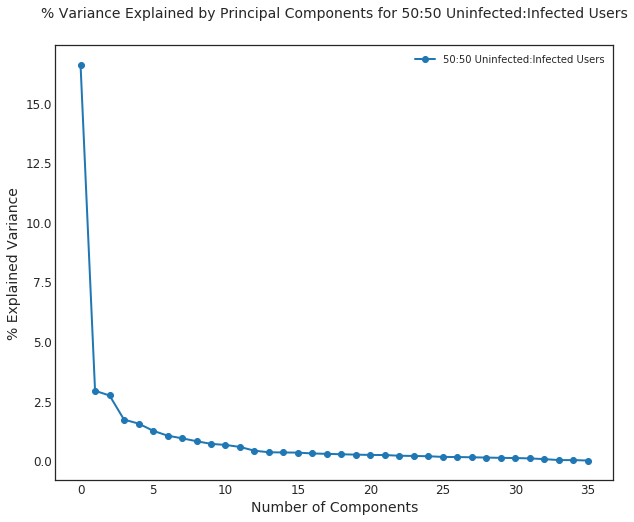

In [59]:
### Plot the scree plot to analyze the number of components to be selected for PCA

sns.set_style('white')
pca = PCA(random_state=0)
pca.fit(scaled_X)
plt.figure(1, figsize=(10, 8))
plt.clf()
plt.plot(pca.explained_variance_,'-o', linewidth=2,label='50:50 Uninfected:Infected Users')
plt.axis('tight')
plt.xlabel('Number of Components',size=14)
plt.xticks(size=12)
plt.ylabel('% Explained Variance',size=14)
plt.yticks(size=12)
plt.title('% Variance Explained by Principal Components for 50:50 Uninfected:Infected Users',size=14,y=1.05)
plt.legend()
### Comment to save the plot
# plt.savefig('A1.jpeg',dpi=1200)
plt.show()


In [60]:
### The cell helps us to analyze better when the explained variance sufficiently flattens out
d=pca.explained_variance_
print("Component\t%Explained Variance\tDecrease in % Explained Variance")
for x in range(0, len(d)):
    if x==0:
        print(x+1,"\t\t",np.round(d[x],5),"\t\t",0)
    else:
        print(x+1,"\t\t",np.round(d[x],5),"\t\t",((d[x-1]-d[x])*100/d[x-1]))

Component	%Explained Variance	Decrease in % Explained Variance
1 		 16.59899 		 0
2 		 2.9285 		 82.3573786755
3 		 2.73097 		 6.74499114248
4 		 1.71696 		 37.1300649917
5 		 1.55257 		 9.5746839342
6 		 1.25135 		 19.4009114912
7 		 1.04561 		 16.4419758376
8 		 0.9331 		 10.7595774402
9 		 0.81158 		 13.0237572598
10 		 0.69933 		 13.8314971339
11 		 0.65581 		 6.22177727746
12 		 0.56997 		 13.0892325274
13 		 0.41235 		 27.6553574931
14 		 0.34735 		 15.7627626088
15 		 0.33848 		 2.55255371815
16 		 0.33222 		 1.8507419469
17 		 0.29653 		 10.743201227
18 		 0.2807 		 5.33661155124
19 		 0.26303 		 6.29475084499
20 		 0.24746 		 5.91982057722
21 		 0.23515 		 4.97477334978
22 		 0.23001 		 2.18534138396
23 		 0.20122 		 12.5165836112
24 		 0.19229 		 4.43782813821
25 		 0.17996 		 6.41395392238
26 		 0.15229 		 15.3763580937
27 		 0.14686 		 3.56497973355
28 		 0.1364 		 7.11946655926
29 		 0.12455 		 8.69322382664
30 		 0.11263 		 9.56692608072
31 		 0.10431 		 7.39139947632
32 

In [61]:
### Analyze how each of the origunal component contributes to explain the variance using the decided number of components
pca=PCA(n_components=13,random_state=0)
X_pca1_13=pca.fit_transform(scaled_X)
print("Table for components of PCA when using 13 components with explained variance of",sum(pca.explained_variance_ratio_))
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9',
                                                              'PC-10','PC-11','PC-12','PC-13'])
m

Table for components of PCA when using 13 components with explained variance of 0.885937278413


,NREC,PAR,PAS,LEN,BYS,BYR,SP,DP,NAPP,SIP,DIP,TDIF,0000,0100,0200,0300,0400,0500,0600,0700,0800,0900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300
PC-1,0.242583,0.021153,0.010653,-0.010593,0.005800,0.023999,0.236657,0.071946,0.187322,0.094096,0.224291,-0.068029,0.198534,0.167565,0.144923,0.164294,0.167741,0.156378,0.140661,0.143378,0.156429,0.173762,0.174528,0.185794,0.188727,0.189396,0.187679,0.195053,0.183305,0.164895,0.195795,0.193856,0.205506,0.207214,0.207759,0.204806
PC-2,0.017328,0.454302,0.433282,0.045424,0.250776,0.411142,0.054343,0.067847,0.069085,0.028030,0.052455,-0.048792,0.030407,0.113854,0.158651,0.169310,0.171589,0.188123,0.154669,0.105339,0.048944,-0.017252,-0.021161,-0.030017,-0.023721,-0.067721,-0.171669,-0.109995,-0.184018,-0.187208,-0.158552,-0.163335,-0.066043,-0.072608,-0.066075,-0.016680
PC-3,-0.054606,0.338581,0.329226,-0.043199,0.188033,0.303423,-0.072013,-0.141004,0.040051,0.067619,-0.053478,-0.044788,-0.029976,-0.134632,-0.207052,-0.239564,-0.278968,-0.292509,-0.265633,-0.170940,-0.080611,0.008520,0.024185,0.034618,0.023178,0.070852,0.185370,0.126119,0.204718,0.202829,0.166346,0.176407,0.080947,0.093319,0.066973,0.019390
PC-4,0.056449,0.026698,0.037549,0.125762,0.017332,0.014432,-0.014137,0.008933,-0.166447,-0.275175,-0.023411,0.217666,0.182300,0.226051,0.242512,0.240084,0.145734,0.044876,-0.102153,-0.264388,-0.379725,-0.347107,-0.286637,-0.231250,-0.109372,-0.073676,0.070486,0.044664,0.098677,0.127126,0.148147,0.143329,0.054364,0.063490,0.096374,0.114156
PC-5,0.055280,0.036710,0.094109,0.204814,0.120166,-0.001958,-0.029779,0.200170,-0.259439,-0.225496,-0.063160,0.258744,-0.213086,-0.253827,-0.161982,-0.048938,0.074412,0.190602,0.314222,0.315884,0.165682,0.078051,-0.029805,-0.092878,-0.144501,-0.106017,0.158440,-0.023317,0.188564,0.277477,0.159525,0.191128,-0.039223,-0.065637,-0.103086,-0.172108
PC-6,-0.045881,-0.008796,0.028026,0.635681,0.030125,-0.036005,-0.078450,0.503959,-0.022281,-0.028839,0.192957,0.238995,0.045232,0.005256,-0.062185,-0.089342,-0.110971,-0.141301,-0.168624,-0.115515,0.021666,0.039342,0.122929,0.096344,0.132950,0.142671,-0.079529,0.073290,-0.103645,-0.148504,-0.090986,-0.104435,0.059432,0.057091,0.070882,0.083746
PC-7,-0.020755,0.016632,-0.070462,0.202573,-0.183461,0.058825,-0.010876,0.347628,0.185806,0.442790,0.100668,-0.430172,-0.087567,0.072159,0.106251,0.057123,0.012119,-0.022287,-0.027157,-0.028231,-0.089265,-0.158471,-0.113081,-0.116200,-0.038156,-0.102019,0.151420,-0.093389,0.148472,0.250989,0.085632,0.071227,-0.196171,-0.172746,-0.203666,-0.172342
PC-8,-0.004388,-0.251588,0.154575,-0.001698,0.813996,-0.430701,-0.000843,0.028292,0.033308,0.120901,0.007743,-0.190046,-0.006845,0.008239,0.030840,0.013654,0.008557,0.012392,-0.013246,-0.035112,-0.058192,-0.055217,-0.020237,-0.013125,0.009665,-0.006923,0.011473,0.006679,0.004808,0.010982,-0.000268,0.001077,-0.009875,-0.020152,-0.029561,0.015656
PC-9,-0.012346,0.026039,-0.001029,-0.371136,-0.029284,0.041403,-0.107723,0.498409,-0.137962,-0.465876,0.115777,-0.496371,-0.012085,-0.096815,-0.168850,-0.010135,0.009257,0.031230,0.013751,-0.025614,-0.062384,-0.073813,-0.024984,-0.036282,0.024995,0.110700,-0.038107,0.112347,-0.027602,-0.066127,-0.007043,-0.027666,0.099339,0.058250,0.064997,0.035628
PC-10,0.013065,-0.001130,-0.025961,0.342305,-0.071124,0.008601,-0.028687,-0.180808,-0.013173,0.229323,-0.104554,-0.310998,0.000936,-0.234291,-0.221825,-0.099271,0.045235,0.140030,0.187507,0.136791,-0.086728,-0.098139,-0.278575,-0.154358,-0.146692,-0.110788,-0.139573,0.114547,-0.085592,-0.161281,-0.011266,0.044358,0.304267,0.266631,0.276955,0.180711


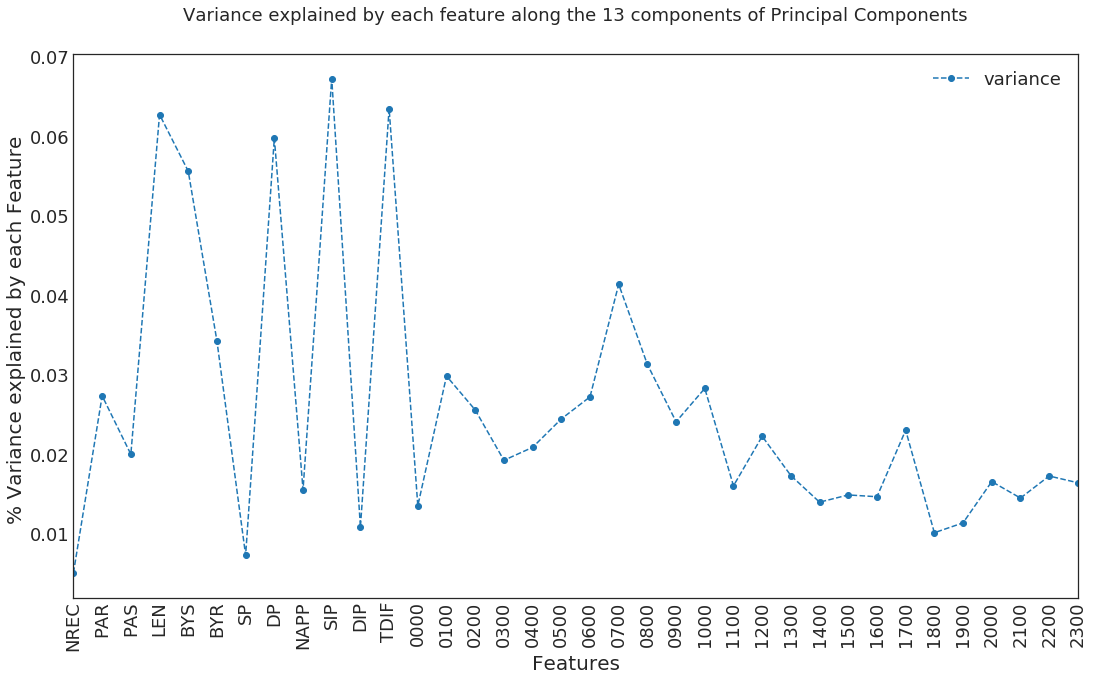

In [62]:
pca_inv_data = pca.components_

### Plot the variance explained by each feature for the decided number of components of PCA
fig = plt.figure(figsize=(18, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('% Variance explained by each Feature ', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),orig_X.columns,rotation=90)
plt.title('Variance explained by each feature along the 13 components of Principal Components',size=18,y=1.05)
plt.legend(loc='upper right', fontsize=18)
# plt.savefig('B.jpeg',dpi=1200,bbox_inches = 'tight')
plt.show()

### For the rest of part 1,i.e. for 50:50 Infected and Uninfected Users split we apply Kmeans for differnet combinations of data which include scaled data, PCA with Scaled data using differnet number of components and analyze not only the sum of square of distances but also the cluster purity based on the ground truth.

### K-Means

Kmeans on data


Cluster_Labels,0
infected#,1215.0
uninfected#,1215.0
infected%,50.0
uninfected%,50.0


Sum of square of distances is: 2.36200603981e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1
infected#,1176.00,39.0
uninfected#,1189.00,26.0
infected%,49.73,60.0
uninfected%,50.27,40.0


Sum of square of distances is: 1.11952829922e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2
infected#,1094.00,6.00,115.00
uninfected#,1146.00,5.00,64.00
infected%,48.84,54.55,64.25
uninfected%,51.16,45.45,35.75


Sum of square of distances is: 6.34007133584e+13

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2,3
infected#,230.00,4.00,35.0,946.00
uninfected#,120.00,5.00,21.0,1069.00
infected%,65.71,44.44,62.5,46.95
uninfected%,34.29,55.56,37.5,53.05


Sum of square of distances is: 4.05468015084e+13

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



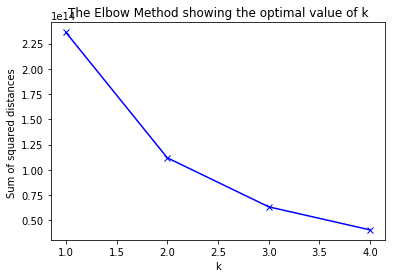

The minimum sum of sqaures of distances is : 4.05468015084e+13  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [15]:
print("Kmeans on data")
get_kmeans(X)

### K-Means on scaled data

Kmeans on scaled data


Cluster_Labels,0
infected#,1215.0
uninfected#,1215.0
infected%,50.0
uninfected%,50.0


Sum of square of distances is: 87480.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1
infected#,526.00,689.00
uninfected#,1040.00,175.00
infected%,33.59,79.75
uninfected%,66.41,20.25


Sum of square of distances is: 65790.8505493

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2
infected#,717.00,496.00,2.0
uninfected#,195.00,1020.00,0.0
infected%,78.62,32.72,100.0
uninfected%,21.38,67.28,0.0


Sum of square of distances is: 56267.952692

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2,3
infected#,697.00,2.0,179.00,337.00
uninfected#,252.00,0.0,32.00,931.00
infected%,73.45,100.0,84.83,26.58
uninfected%,26.55,0.0,15.17,73.42


Sum of square of distances is: 49831.3719213

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



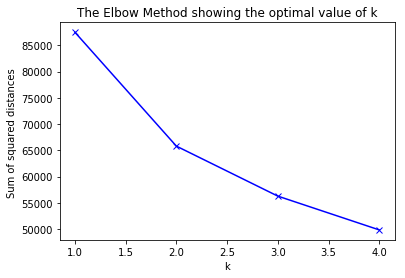

The minimum sum of sqaures of distances is : 49831.3719213  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [16]:
print("Kmeans on scaled data")
get_kmeans(scaled_X)

### PCA using 3 components on scaled data

The explained variance for pca applied on scaled data is 0.618036130179 using 3 components
Kmeans on sclaed data with PCA using 3 components:


Cluster_Labels,0
infected#,1215.0
uninfected#,1215.0
infected%,50.0
uninfected%,50.0


Sum of square of distances is: 7287.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1
infected#,708.00,507.00
uninfected#,192.00,1023.00
infected%,78.67,33.14
uninfected%,21.33,66.86


Sum of square of distances is: 5905.04538904

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2
infected#,558.0,644.0,13.0
uninfected#,1050.0,153.0,12.0
infected%,34.7,80.8,52.0
uninfected%,65.3,19.2,48.0


Sum of square of distances is: 4672.70962137

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2,3
infected#,647.00,541.00,25.00,2.0
uninfected#,155.00,1042.00,18.00,0.0
infected%,80.67,34.18,58.14,100.0
uninfected%,19.33,65.82,41.86,0.0


Sum of square of distances is: 3570.06300705

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



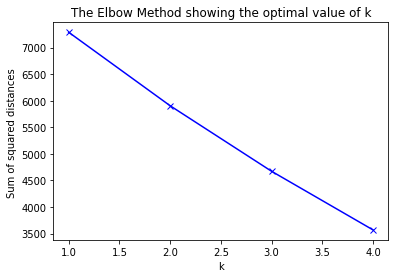

The minimum sum of sqaures of distances is : 3570.06300705  for k 4


In [17]:
pca=PCA(n_components=3,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 3 components")
print("Kmeans on sclaed data with PCA using 3 components:")
model=get_kmeans(X_pca_scaled)

### PCA on scaled data using 4 components

The explained variance for pca applied on scaled data is 0.665709819716 using 4 components
Kmeans on sclaed data with PCA using 4 components:


Cluster_Labels,0
infected#,1215.0
uninfected#,1215.0
infected%,50.0
uninfected%,50.0


Sum of square of distances is: 9716.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1
infected#,619.00,596.00
uninfected#,244.00,971.00
infected%,71.73,38.03
uninfected%,28.27,61.97


Sum of square of distances is: 8296.39216711

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2
infected#,735.00,478.00,2.0
uninfected#,251.00,964.00,0.0
infected%,74.54,33.15,100.0
uninfected%,25.46,66.85,0.0


Sum of square of distances is: 6895.77155038

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2,3
infected#,527.00,673.00,13.0,2.0
uninfected#,204.00,999.00,12.0,0.0
infected%,72.09,40.25,52.0,100.0
uninfected%,27.91,59.75,48.0,0.0


Sum of square of distances is: 5634.06663937

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



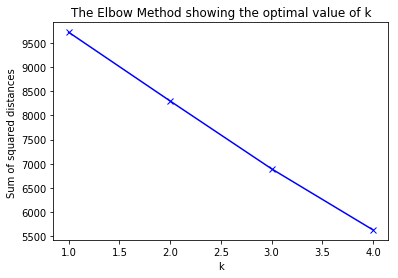

The minimum sum of sqaures of distances is : 5634.06663937  for k 4


In [18]:
### PCA on scaled data using 4 components
pca=PCA(n_components=4,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_4=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 4 components")
print("Kmeans on sclaed data with PCA using 4 components:")
model=get_kmeans(X_pca_scaled_4)

### PCA on scaled data using 5 components

The explained variance for pca applied on scaled data is 0.708818886886 using 5 components
Kmeans on sclaed data with PCA using 5 components:


Cluster_Labels,0
infected#,1215.0
uninfected#,1215.0
infected%,50.0
uninfected%,50.0


Sum of square of distances is: 12145.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1
infected#,1213.00,2.0
uninfected#,1215.00,0.0
infected%,49.96,100.0
uninfected%,50.04,0.0


Sum of square of distances is: 10345.9540803

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2
infected#,394.00,2.0,819.00
uninfected#,943.00,0.0,272.00
infected%,29.47,100.0,75.07
uninfected%,70.53,0.0,24.93


Sum of square of distances is: 8824.8632939

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2,3
infected#,746.00,363.00,104.00,2.0
uninfected#,305.00,888.00,22.00,0.0
infected%,70.98,29.02,82.54,100.0
uninfected%,29.02,70.98,17.46,0.0


Sum of square of distances is: 7599.40189258

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



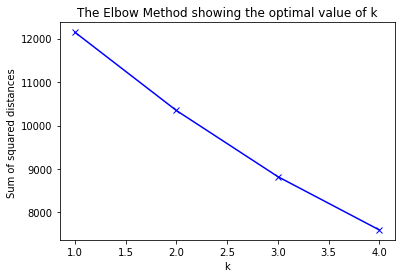

The minimum sum of sqaures of distances is : 7599.40189258  for k 4


In [19]:
### PCA on scaled data using 5 components
pca=PCA(n_components=5,whiten=True,random_state=0)
X_pca_scaled_5=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 5 components")
print("Kmeans on sclaed data with PCA using 5 components:")
model=get_kmeans(X_pca_scaled_5)

### PCA on scaled data using 6 components

The explained variance for pca applied on scaled data is 0.743564339081 using 6 components
Kmeans on sclaed data with PCA using 6 components:


Cluster_Labels,0
infected#,1215.0
uninfected#,1215.0
infected%,50.0
uninfected%,50.0


Sum of square of distances is: 14574.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1
infected#,1213.00,2.0
uninfected#,1215.00,0.0
infected%,49.96,100.0
uninfected%,50.04,0.0


Sum of square of distances is: 12713.1489448

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2
infected#,407.00,1.0,807.00
uninfected#,948.00,0.0,267.00
infected%,30.04,100.0,75.14
uninfected%,69.96,0.0,24.86


Sum of square of distances is: 11616.1772064

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2,3
infected#,525.00,430.00,258.00,2.0
uninfected#,213.00,939.00,63.00,0.0
infected%,71.14,31.41,80.37,100.0
uninfected%,28.86,68.59,19.63,0.0


Sum of square of distances is: 9973.9543038

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



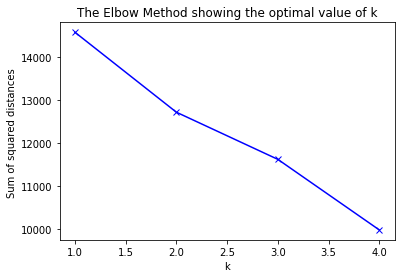

The minimum sum of sqaures of distances is : 9973.9543038  for k 4


In [20]:
### PCA on scaled data using 6 components
pca=PCA(n_components=6,whiten=True,random_state=0)
X_pca_scaled_6=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 6 components")
print("Kmeans on sclaed data with PCA using 6 components:")
model=get_kmeans(X_pca_scaled_6)

### PCA on scaled data using 9 components

The explained variance for pca applied on scaled data is 0.821040280312 using 9 components
Kmeans on sclaed data with PCA using 9 components:


Cluster_Labels,0
infected#,1215.0
uninfected#,1215.0
infected%,50.0
uninfected%,50.0


Sum of square of distances is: 21861.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1
infected#,1212.0,3.0
uninfected#,1212.0,3.0
infected%,50.0,50.0
uninfected%,50.0,50.0


Sum of square of distances is: 19896.9065972

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2
infected#,388.00,824.00,3.0
uninfected#,904.00,308.00,3.0
infected%,30.03,72.79,50.0
uninfected%,69.97,27.21,50.0


Sum of square of distances is: 18272.2506651

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2,3
infected#,363.00,848.00,3.0,1.0
uninfected#,86.00,1126.00,3.0,0.0
infected%,80.85,42.96,50.0,100.0
uninfected%,19.15,57.04,50.0,0.0


Sum of square of distances is: 16626.4600184

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



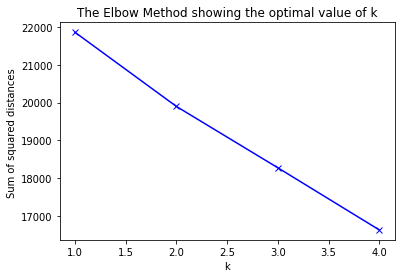

The minimum sum of sqaures of distances is : 16626.4600184  for k 4


In [21]:
### PCA on scaled data using 9 components
pca=PCA(n_components=9,whiten=True,random_state=0)
X_pca_scaled_9=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 9 components")
print("Kmeans on sclaed data with PCA using 9 components:")
model=get_kmeans(X_pca_scaled_9)

### PCA on scaled data using 11 components

The explained variance for pca applied on scaled data is 0.858664429176 using 11 components
Kmeans on sclaed data with PCA using 11 components:


Cluster_Labels,0
infected#,1215.0
uninfected#,1215.0
infected%,50.0
uninfected%,50.0


Sum of square of distances is: 26719.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1
infected#,1214.00,1.0
uninfected#,1215.00,0.0
infected%,49.98,100.0
uninfected%,50.02,0.0


Sum of square of distances is: 24781.5954095

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2
infected#,718.00,494.00,3.0
uninfected#,1080.00,132.00,3.0
infected%,39.93,78.91,50.0
uninfected%,60.07,21.09,50.0


Sum of square of distances is: 23170.0326666

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2,3
infected#,137.00,723.00,352.00,3.0
uninfected#,34.00,339.00,839.00,3.0
infected%,80.12,68.08,29.55,50.0
uninfected%,19.88,31.92,70.45,50.0


Sum of square of distances is: 21793.565591

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



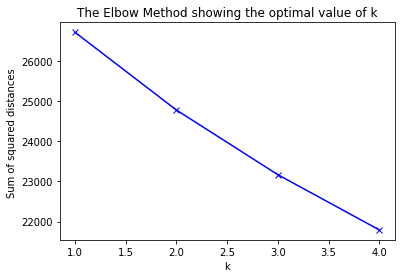

The minimum sum of sqaures of distances is : 21793.565591  for k 4


In [22]:
### PCA on scaled data using 11 components
pca=PCA(n_components=11,whiten=True,random_state=0)
X_pca_scaled_11=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 11 components")
print("Kmeans on sclaed data with PCA using 11 components:")
model=get_kmeans(X_pca_scaled_11)

### PCA on scaled data using 12 components

The explained variance for pca applied on scaled data is 0.874489906476 using 12 components
Kmeans on sclaed data with PCA using 12 components:


Cluster_Labels,0
infected#,1215.0
uninfected#,1215.0
infected%,50.0
uninfected%,50.0


Sum of square of distances is: 29148.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1
infected#,381.00,834.0
uninfected#,881.00,334.0
infected%,30.19,71.4
uninfected%,69.81,28.6


Sum of square of distances is: 27518.5950344

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2
infected#,473.00,741.00,1.0
uninfected#,136.00,1079.00,0.0
infected%,77.67,40.71,100.0
uninfected%,22.33,59.29,0.0


Sum of square of distances is: 25603.4836569

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2,3
infected#,712.00,499.00,3.0,1.0
uninfected#,1080.00,132.00,3.0,0.0
infected%,39.73,79.08,50.0,100.0
uninfected%,60.27,20.92,50.0,0.0


Sum of square of distances is: 23630.3465913

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



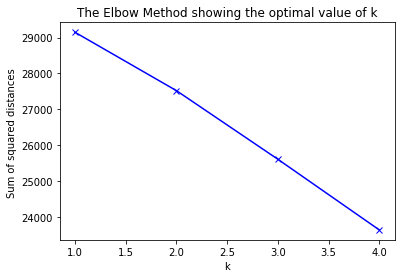

The minimum sum of sqaures of distances is : 23630.3465913  for k 4


In [23]:
### PCA on scaled data using 12 components
pca=PCA(n_components=12,whiten=True,random_state=0)
X_pca_scaled_12=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 12 components")
print("Kmeans on sclaed data with PCA using 12 components:")
model=get_kmeans(X_pca_scaled_12)

### PCA on scaled data using 13 components

The explained variance for pca applied on scaled data is 0.885937278413 using 13 components
Kmeans on sclaed data with PCA using 13 components:


Cluster_Labels,0
infected#,1215.0
uninfected#,1215.0
infected%,50.0
uninfected%,50.0


Sum of square of distances is: 31577.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1
infected#,486.00,729.00
uninfected#,987.00,228.00
infected%,32.99,76.18
uninfected%,67.01,23.82


Sum of square of distances is: 29932.9161223

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2
infected#,844.00,1.0,370.00
uninfected#,334.00,0.0,881.00
infected%,71.65,100.0,29.58
uninfected%,28.35,0.0,70.42


Sum of square of distances is: 27953.8828462

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2,3
infected#,687.00,524.00,3.0,1.0
uninfected#,1064.00,148.00,3.0,0.0
infected%,39.23,77.98,50.0,100.0
uninfected%,60.77,22.02,50.0,0.0


Sum of square of distances is: 25997.6144023

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



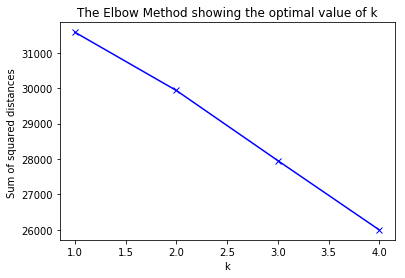

The minimum sum of sqaures of distances is : 25997.6144023  for k 4


In [24]:
### PCA on scaled data using 13 components
pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_scaled_13=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 13 components")
print("Kmeans on sclaed data with PCA using 13 components:")
model=get_kmeans(X_pca_scaled_13)

<h2>2. <a id='2' style="text-decoration : none; color : #000000;"> 70:30 Uninfected:Infected Users</a></h2>

#### We represent  Infected Users as 1 and Uninfected Users as 0

In [64]:
## Read the csv file which contains the data aggregated on user level for 70:30 Uninfected: Infected Users
z=pd.read_csv('Feature_with_Hour_Class_70_30.csv')
z.set_index(['Source_User'],drop=True,inplace=True)
print("Infected/Uninfected Users")
z.Target.value_counts()

Infected/Uninfected Users


0    2832
1    1215
Name: Target, dtype: int64

### feature Set

In [65]:
### Build the feature set
X=z.iloc[:,z.columns!='Target']


### Labelling the features
X.columns=['Number of Records','Average Size of Packets Received','Average Size of Packets Sent','Average Elapsed Time',
           'Average number of Bytes sent', 'Average number of Bytes received','Number of different Source Ports',
           'Number of different Destination Ports', 'Number of different Applications','Number of different Source IP',
           'Number of different Destination IP','Average differnce in Received Time',
          'Number of Sessions at 00:00','Number of Sessions at 01:00','Number of Sessions at 02:00','Number of Sessions at 03:00',
          'Number of Sessions at 04:00','Number of Sessions at 05:00','Number of Sessions at 06:00',
          'Number of Sessions at 07:00','Number of Sessions at 08:00','Number of Sessions at 09:00',
          'Number of Sessions at 10:00','Number of Sessions at 11:00','Number of Sessions at 12:00',
          'Number of Sessions at 13:00','Number of Sessions at 14:00','Number of Sessions at 15:00',
          'Number of Sessions at 16:00','Number of Sessions at 17:00','Number of Sessions at 18:00',
          'Number of Sessions at 19:00','Number of Sessions at 20:00','Number of Sessions at 21:00',
          'Number of Sessions at 22:00','Number of Sessions at 23:00']

### Labelling the feature code
X.columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]
X.head(2)

,NREC,PAR,PAS,LEN,BYS,BYR,SP,DP,NAPP,SIP,DIP,TDIF,0000,0100,0200,0300,0400,0500,0600,0700,0800,0900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300
Source_User,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
f312c5ac2868560b18b854fe68465445253bb1850ca9092ad26568c74031b027,2526,152.272763,115.762470,102.322249,18103.792953,187670.846397,2247.0,16.0,42,15,641,1059.323040,148,203,90,50,35,47,41,18,75,50,84,120,64,147,139,85,103,126,107,155,103,201,197,138
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48ba414cda7056e4148e,2507,132.393299,56.954128,90.832469,7080.045473,157025.019944,2332.0,13.0,43,45,708,1061.297567,78,75,56,34,15,40,46,45,95,83,152,106,98,86,105,84,215,254,124,116,191,157,131,121


In [67]:
### We will store the labels ['Infected','Uninfected'] in a separate dataframe
target=z.Target.reset_index(drop=True)
target=target.apply(lambda x:'infected' if x==1 else 'uninfected')

### Scaled X

In [69]:
### Retain the original data and column names
orig_X=X.copy()

## Create a new feature set and scale it using Standard Scaler
X=X.values
scaler_X=StandardScaler()
scaler_X.fit(X)
scaled_X=scaler_X.transform(X)

In [70]:
scaled_X[0:2]

array([[  7.08584226e-01,   1.00458942e-01,   3.26806205e-01,
          1.33125340e-02,   6.79357519e-02,   1.17702290e-01,
          1.00742238e+00,  -3.18280228e-02,   1.38642272e+00,
         -5.73369609e-01,   9.51661219e-01,  -3.52840839e-01,
          4.83566592e-01,   6.75063551e-01,   1.63764248e-01,
         -1.05324717e-02,  -1.07221840e-01,  -2.63644024e-02,
         -4.77087948e-02,  -2.67810006e-01,   5.24644767e-01,
          1.47202604e-01,   8.25598975e-01,   1.33122647e+00,
          3.52833599e-01,   1.77485966e+00,   1.47304863e+00,
          7.24066404e-01,   7.62830496e-01,   5.48426105e-01,
          6.77085462e-01,   8.99647440e-01,   5.63923423e-01,
          1.48113664e+00,   1.22824996e+00,   8.66335967e-01],
       [  6.98964282e-01,   2.14443664e-02,  -8.03109851e-02,
         -1.00132821e-01,  -1.16476886e-01,   1.93038174e-02,
          1.07624014e+00,  -5.46771255e-02,   1.46444442e+00,
          1.26546612e+00,   1.13889700e+00,  -3.52784240e-01,
       

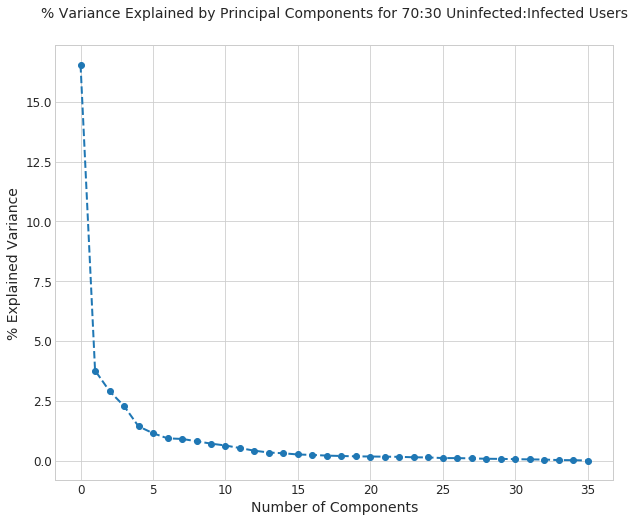

In [72]:
### Plot the scree plot to analyze the number of components to be selected for PCA
sns.set_style('whitegrid')
pca = PCA(random_state=0)
pca.fit(scaled_X)
plt.figure(1, figsize=(10, 8))
plt.clf()
plt.plot(pca.explained_variance_,'--o', linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Components',size=14)
plt.xticks(size=12)
plt.ylabel('% Explained Variance',size=14)
plt.yticks(size=12)
plt.title('% Variance Explained by Principal Components for 70:30 Uninfected:Infected Users',size=14,y=1.05)
### Code to save the plot
# plt.savefig('B.jpeg',dpi=1200)
plt.show()

In [73]:
### The cell helps us to analyze better when the explained variance sufficiently flattens out
d=pca.explained_variance_
print("Component\t%Explained Variance\tDecrease in % Explained Variance")
for x in range(0, len(d)):
    if x==0:
        print(x+1,"\t\t",np.round(d[x],5),"\t\t",0)
    else:
        print(x+1,"\t\t",np.round(d[x],5),"\t\t",((d[x-1]-d[x])*100/d[x-1]))

Component	%Explained Variance	Decrease in % Explained Variance
1 		 16.5298 		 0
2 		 3.76398 		 77.2291192377
3 		 2.90195 		 22.9019977949
4 		 2.27906 		 21.4644568154
5 		 1.42811 		 37.3377148563
6 		 1.14197 		 20.0363281827
7 		 0.9281 		 18.728466076
8 		 0.90213 		 2.79854656189
9 		 0.80819 		 10.4125461012
10 		 0.7065 		 12.5823025565
11 		 0.6283 		 11.0690747946
12 		 0.52049 		 17.1586013392
13 		 0.41076 		 21.0815350408
14 		 0.33482 		 18.4882112494
15 		 0.30246 		 9.6649728933
16 		 0.25278 		 16.4247684285
17 		 0.23485 		 7.09476847847
18 		 0.2051 		 12.6682978255
19 		 0.19021 		 7.2567342323
20 		 0.17463 		 8.1932891807
21 		 0.1678 		 3.91066852518
22 		 0.1617 		 3.63746626735
23 		 0.15416 		 4.66229516911
24 		 0.13566 		 11.9976167206
25 		 0.13 		 4.17309613764
26 		 0.10238 		 21.2478522128
27 		 0.101 		 1.34471301038
28 		 0.08993 		 10.9581766096
29 		 0.07345 		 18.3248879681
30 		 0.06892 		 6.17635031279
31 		 0.05735 		 16.7872690475
32 		 0.0481

In [74]:
### Analyze how each of the origunal component contributes to explain the variance using the decided number of components
pca=PCA(n_components=13,random_state=0)
X_pca1_13=pca.fit_transform(scaled_X)
print("Table for components of PCA when using 13 components with explained variance of",sum(pca.explained_variance_ratio_))
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9',
                                                              'PC-10','PC-11','PC-12','PC-13'])
m

Table for components of PCA when using 13 components with explained variance of 0.915033450989


,NREC,PAR,PAS,LEN,BYS,BYR,SP,DP,NAPP,SIP,DIP,TDIF,0000,0100,0200,0300,0400,0500,0600,0700,0800,0900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300
PC-1,0.240442,0.021149,0.013889,-0.003442,0.008617,0.022419,0.225722,0.065336,0.164688,0.099022,0.188601,-0.060239,0.185825,0.174754,0.177771,0.175937,0.142786,0.138339,0.131112,0.138025,0.147469,0.157689,0.158981,0.204409,0.204236,0.196907,0.192626,0.209406,0.166099,0.188577,0.202453,0.207735,0.214657,0.216296,0.212504,0.214004
PC-2,0.035895,-0.087901,-0.079105,-0.015431,-0.048396,-0.084018,-0.147763,-0.100701,-0.151292,-0.089952,-0.167330,0.081503,0.273880,0.268282,0.197054,-0.113936,-0.263795,-0.286618,-0.297394,-0.285284,-0.262127,-0.230630,-0.182954,0.058283,0.086339,-0.017462,0.027247,0.095738,-0.057211,0.243836,0.053748,0.190045,0.078026,0.139693,0.188504,0.133480
PC-3,-0.027244,0.549539,0.534553,0.017832,0.292459,0.509415,-0.021024,-0.012955,0.077746,0.060132,0.017277,-0.059573,0.018988,0.010044,-0.008636,-0.065003,-0.103240,-0.107696,-0.110751,-0.081310,-0.051390,-0.036258,-0.010662,0.008103,0.011773,0.002445,0.013536,0.014565,0.007492,0.016557,0.007472,0.012224,0.014398,0.018252,0.012821,0.015387
PC-4,0.124586,0.095652,0.099401,0.009968,0.059609,0.083726,0.012749,-0.106113,-0.215064,-0.215013,-0.187932,0.155386,0.172437,0.226791,0.284319,0.310714,0.306708,0.308638,0.264996,0.128341,-0.032850,-0.136788,-0.214175,-0.064671,-0.043621,-0.155630,-0.220998,-0.102690,-0.272696,-0.004423,-0.145495,-0.016702,-0.035598,-0.008374,0.045587,0.047426
PC-5,0.003029,0.020703,0.055128,0.489017,0.034216,0.002440,-0.076792,0.559822,-0.258244,-0.332679,0.177393,0.327260,-0.060307,-0.061329,-0.057701,0.001830,0.027945,0.035480,0.033136,-0.009039,-0.071722,-0.090995,-0.043403,-0.073141,0.029843,0.048032,0.129337,0.079792,0.181625,0.079858,0.107991,0.064208,-0.018490,-0.036961,-0.040869,-0.039373
PC-6,0.015238,0.031525,0.050419,-0.398983,0.069495,0.022041,0.024721,-0.355233,-0.186510,-0.294848,-0.201876,0.298913,-0.120631,-0.165160,-0.163262,-0.049157,0.041050,0.055664,0.091718,0.082400,0.020998,0.063233,-0.045831,-0.107965,-0.149947,-0.038423,0.241554,0.049688,0.343017,0.160625,0.276618,0.172648,0.058012,0.019394,-0.021785,-0.072393
PC-7,-0.000731,-0.221570,0.136241,0.083893,0.819280,-0.365183,-0.015884,-0.058419,-0.035776,0.028098,-0.043198,0.138943,0.026614,0.015296,-0.002638,-0.091368,-0.083417,-0.042448,-0.006393,0.069117,0.125842,0.119356,0.105807,0.080901,0.023183,0.006723,-0.062672,-0.006649,-0.102193,-0.020223,-0.067966,-0.011877,0.021050,0.028716,0.027223,0.030795
PC-8,0.008115,-0.099717,0.024450,-0.051105,0.284405,-0.145650,0.016363,0.102893,0.072822,0.128331,0.035327,-0.541082,-0.061903,-0.032114,0.018971,0.176132,0.171571,0.137079,0.056044,-0.114189,-0.316450,-0.314685,-0.277604,-0.193848,-0.065477,-0.064525,0.156000,0.022436,0.233082,0.094041,0.157129,0.064821,-0.048193,-0.071108,-0.086084,-0.058599
PC-9,0.011415,0.009091,-0.016956,0.729198,-0.084435,0.007596,0.056314,-0.446181,0.075252,0.279185,-0.193428,0.017781,-0.022570,-0.039614,-0.024921,-0.036317,0.008135,0.008571,0.039774,0.074413,0.042241,0.045156,-0.079882,-0.082647,-0.162331,-0.156388,0.060121,-0.063950,0.091469,0.091890,0.133341,0.109111,0.037765,0.041162,0.019362,-0.013467
PC-10,-0.022024,-0.019180,-0.019700,-0.115175,0.036524,-0.015089,0.095789,-0.014126,0.254281,0.454736,0.144626,0.650272,-0.052033,-0.037096,0.004832,0.181951,0.135637,0.065386,-0.071244,-0.221616,-0.262398,-0.185368,-0.053237,-0.075991,-0.002735,0.055688,0.013379,0.006920,0.040287,-0.130332,0.012072,-0.084646,0.035061,0.002498,-0.018038,0.051273


In [75]:
pca_inv_data_70 = pca.components_

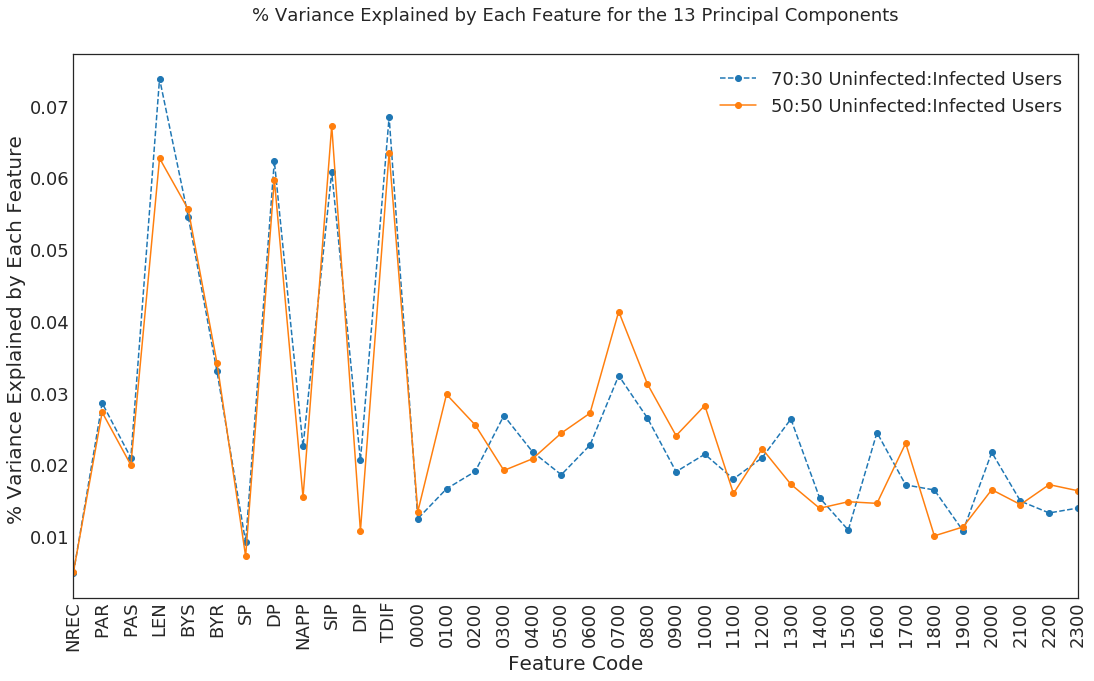

In [78]:
### Plot the variance explained by each feature for the decided number of components of PCA for both the 50:50 ratio and 
### 70:30 ratio of Uninfected:Infected Users
sns.set_style('white')
fig = plt.figure(figsize=(18, 10))
plt.plot(np.square(pca_inv_data_70.std(axis=0)), '--o', label = '70:30 Uninfected:Infected Users')
plt.plot(np.square(pca_inv_data_50.std(axis=0)), '-o', label = '50:50 Uninfected:Infected Users')
plt.legend(loc='lower right')
plt.ylabel('% Variance Explained by Each Feature ', fontsize=20)
plt.xlabel('Feature Code', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),orig_X.columns,rotation=90)
plt.title('% Variance Explained by Each Feature for the 13 Principal Components',size=18,y=1.05)
plt.legend(loc='upper right', fontsize=18)
### Comment to save the plot
# plt.savefig('E2.jpeg', dpi=1200)
plt.show()

### For the rest of part 2,i.e. for 70:30 Infected and Uninfected Users split we apply Kmeans for differnet combinations of data which include scaled data, PCA with Scaled data using differnet number of components and analyze not only the sum of square of distances but also the cluster purity based on the ground truth.

### K-Means

Kmeans on data


Cluster_Labels,0
infected#,1215.00
uninfected#,2832.00
infected%,30.02
uninfected%,69.98


Sum of square of distances is: 4.11965043873e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1
infected#,1176.00,39.00
uninfected#,2756.00,76.00
infected%,29.91,33.91
uninfected%,70.09,66.09


Sum of square of distances is: 1.86479843912e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2
infected#,1106.00,6.00,103.00
uninfected#,2686.00,16.00,130.00
infected%,29.17,27.27,44.21
uninfected%,70.83,72.73,55.79


Sum of square of distances is: 9.9578569803e+13

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2,3
infected#,252.00,37.00,922.00,4.00
uninfected#,323.00,64.00,2432.00,13.00
infected%,43.83,36.63,27.49,23.53
uninfected%,56.17,63.37,72.51,76.47


Sum of square of distances is: 6.53938020011e+13

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



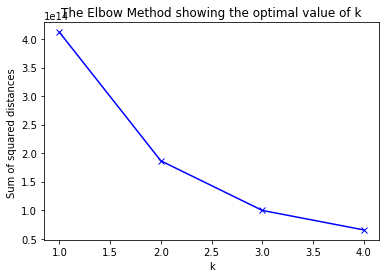

The minimum sum of sqaures of distances is : 6.53938020011e+13  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [45]:
print("Kmeans on data")
get_kmeans(X)

### K-Means on scaled data

Kmeans on scaled data


Cluster_Labels,0
infected#,1215.00
uninfected#,2832.00
infected%,30.02
uninfected%,69.98


Sum of square of distances is: 145692.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1
infected#,466.00,749.00
uninfected#,2348.00,484.00
infected%,16.56,60.75
uninfected%,83.44,39.25


Sum of square of distances is: 115492.558243

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2
infected#,460.00,0.0,755.0
uninfected#,2336.00,1.0,495.0
infected%,16.45,0.0,60.4
uninfected%,83.55,100.0,39.6


Sum of square of distances is: 91334.0893349

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2,3
infected#,409.00,15.00,0.0,791.00
uninfected#,2286.00,7.00,1.0,538.00
infected%,15.18,68.18,0.0,59.52
uninfected%,84.82,31.82,100.0,40.48


Sum of square of distances is: 79362.9536632

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



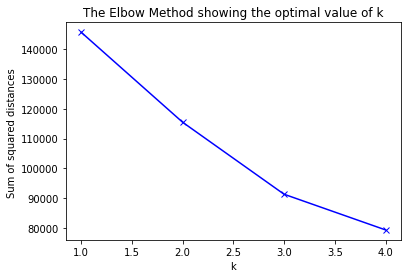

The minimum sum of sqaures of distances is : 79362.9536632  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [46]:
print("Kmeans on scaled data")
get_kmeans(scaled_X)

### PCA using 3 components on scaled data

The explained variance for pca applied on scaled data is 0.644166598093 using 3 components
Kmeans on sclaed data with PCA using 3 components:


Cluster_Labels,0
infected#,1215.00
uninfected#,2832.00
infected%,30.02
uninfected%,69.98


Sum of square of distances is: 12138.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1
infected#,1215.00,0.0
uninfected#,2831.00,1.0
infected%,30.03,0.0
uninfected%,69.97,100.0


Sum of square of distances is: 9147.59741053

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2
infected#,453.0,0.0,762.00
uninfected#,2276.0,1.0,555.00
infected%,16.6,0.0,57.86
uninfected%,83.4,100.0,42.14


Sum of square of distances is: 6959.26271926

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2,3
infected#,471.00,0.0,730.0,14.00
uninfected#,2301.00,1.0,499.0,31.00
infected%,16.99,0.0,59.4,31.11
uninfected%,83.01,100.0,40.6,68.89


Sum of square of distances is: 5033.38111909

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



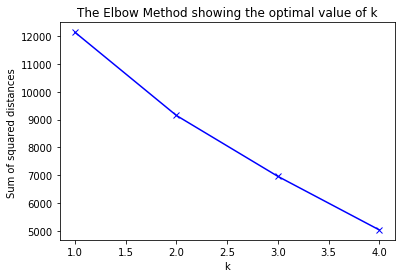

The minimum sum of sqaures of distances is : 5033.38111909  for k 4


In [47]:
pca=PCA(n_components=3,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 3 components")
print("Kmeans on sclaed data with PCA using 3 components:")
model=get_kmeans(X_pca_scaled)

### PCA on scaled data using 4 components

The explained variance for pca applied on scaled data is 0.707458312998 using 4 components
Kmeans on sclaed data with PCA using 4 components:


Cluster_Labels,0
infected#,1215.00
uninfected#,2832.00
infected%,30.02
uninfected%,69.98


Sum of square of distances is: 16184.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1
infected#,1215.00,0.0
uninfected#,2831.00,1.0
infected%,30.03,0.0
uninfected%,69.97,100.0


Sum of square of distances is: 12785.0553086

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2
infected#,810.00,405.00,0.0
uninfected#,632.00,2199.00,1.0
infected%,56.17,15.55,0.0
uninfected%,43.83,84.45,100.0


Sum of square of distances is: 10471.5459318

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2,3
infected#,404.00,0.0,798.00,13.00
uninfected#,2196.00,1.0,605.00,30.00
infected%,15.54,0.0,56.88,30.23
uninfected%,84.46,100.0,43.12,69.77


Sum of square of distances is: 8359.56060256

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



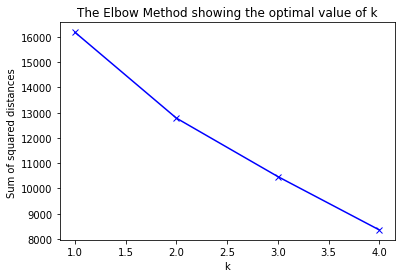

The minimum sum of sqaures of distances is : 8359.56060256  for k 4


In [48]:
### PCA on scaled data using 4 components
pca=PCA(n_components=4,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_4=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 4 components")
print("Kmeans on sclaed data with PCA using 4 components:")
model=get_kmeans(X_pca_scaled_4)

### PCA on scaled data using 5 components

The explained variance for pca applied on scaled data is 0.747118347864 using 5 components
Kmeans on sclaed data with PCA using 5 components:


Cluster_Labels,0
infected#,1215.00
uninfected#,2832.00
infected%,30.02
uninfected%,69.98


Sum of square of distances is: 20230.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1
infected#,1215.00,0.0
uninfected#,2831.00,1.0
infected%,30.03,0.0
uninfected%,69.97,100.0


Sum of square of distances is: 16816.5824246

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2
infected#,316.00,899.0,0.0
uninfected#,2040.00,791.0,1.0
infected%,13.41,53.2,0.0
uninfected%,86.59,46.8,100.0


Sum of square of distances is: 14354.8156188

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2,3
infected#,312.00,0.0,897.0,6.0
uninfected#,2020.00,1.0,805.0,6.0
infected%,13.38,0.0,52.7,50.0
uninfected%,86.62,100.0,47.3,50.0


Sum of square of distances is: 11990.153425

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



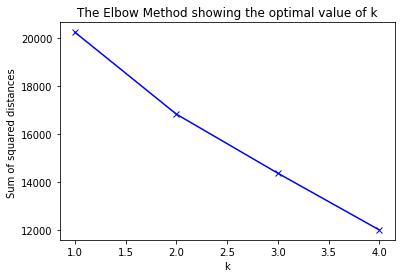

The minimum sum of sqaures of distances is : 11990.153425  for k 4


In [49]:
### PCA on scaled data using 5 components
pca=PCA(n_components=5,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_5=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 5 components")
print("Kmeans on sclaed data with PCA using 5 components:")
model=get_kmeans(X_pca_scaled_5)

### PCA on scaled data using 6 components

The explained variance for pca applied on scaled data is 0.778831967986 using 6 components
Kmeans on sclaed data with PCA using 6 components:


Cluster_Labels,0
infected#,1215.00
uninfected#,2832.00
infected%,30.02
uninfected%,69.98


Sum of square of distances is: 24276.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1
infected#,1215.00,0.0
uninfected#,2831.00,1.0
infected%,30.03,0.0
uninfected%,69.97,100.0


Sum of square of distances is: 20786.0166095

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2
infected#,927.0,0.0,288.0
uninfected#,887.0,1.0,1944.0
infected%,51.1,0.0,12.9
uninfected%,48.9,100.0,87.1


Sum of square of distances is: 18242.9359757

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2,3
infected#,244.00,967.00,0.0,4.00
uninfected#,1822.00,1001.00,1.0,8.00
infected%,11.81,49.14,0.0,33.33
uninfected%,88.19,50.86,100.0,66.67


Sum of square of distances is: 15643.441188

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



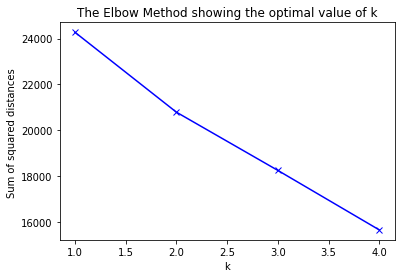

The minimum sum of sqaures of distances is : 15643.441188  for k 4


In [50]:
### PCA on scaled data using 6 components
pca=PCA(n_components=6,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_6=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 6 components")
print("Kmeans on sclaed data with PCA using 6 components:")
model=get_kmeans(X_pca_scaled_6)

### PCA on scaled data using 9 components

The explained variance for pca applied on scaled data is 0.85210316273 using 9 components
Kmeans on sclaed data with PCA using 9 components:


Cluster_Labels,0
infected#,1215.00
uninfected#,2832.00
infected%,30.02
uninfected%,69.98


Sum of square of distances is: 36414.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1
infected#,1212.00,3.0
uninfected#,2829.00,3.0
infected%,29.99,50.0
uninfected%,70.01,50.0


Sum of square of distances is: 33442.1115007

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2
infected#,1213.0,0.0,2.0
uninfected#,2831.0,1.0,0.0
infected%,30.0,0.0,100.0
uninfected%,70.0,100.0,0.0


Sum of square of distances is: 30112.9447503

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2,3
infected#,1209.00,3.00,3.0,0.0
uninfected#,2824.00,4.00,3.0,1.0
infected%,29.98,42.86,50.0,0.0
uninfected%,70.02,57.14,50.0,100.0


Sum of square of distances is: 26955.5253074

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



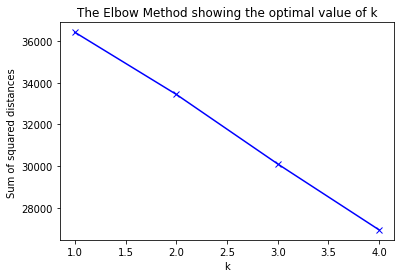

The minimum sum of sqaures of distances is : 26955.5253074  for k 4


In [51]:
### PCA on scaled data using 9 components
pca=PCA(n_components=9,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_9=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 9 components")
print("Kmeans on sclaed data with PCA using 9 components:")
model=get_kmeans(X_pca_scaled_9)

### PCA on scaled data using 11 components

The explained variance for pca applied on scaled data is 0.88917180198 using 11 components
Kmeans on sclaed data with PCA using 11 components:


Cluster_Labels,0
infected#,1215.00
uninfected#,2832.00
infected%,30.02
uninfected%,69.98


Sum of square of distances is: 44506.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1
infected#,1215.00,0.0
uninfected#,2831.00,1.0
infected%,30.03,0.0
uninfected%,69.97,100.0


Sum of square of distances is: 40676.001567

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2
infected#,934.00,0.0,281.00
uninfected#,943.00,1.0,1888.00
infected%,49.76,0.0,12.96
uninfected%,50.24,100.0,87.04


Sum of square of distances is: 37902.0046982

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2,3
infected#,936.00,1.0,0.0,278.00
uninfected#,940.00,0.0,1.0,1891.00
infected%,49.89,100.0,0.0,12.82
uninfected%,50.11,0.0,100.0,87.18


Sum of square of distances is: 35265.9040269

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



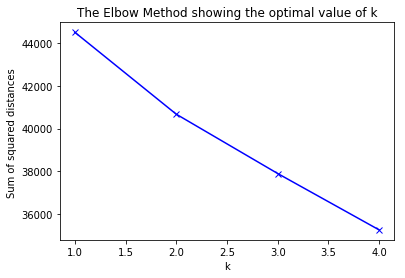

The minimum sum of sqaures of distances is : 35265.9040269  for k 4


In [52]:
### PCA on scaled data using 11 components
pca=PCA(n_components=11,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_11=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 11 components")
print("Kmeans on sclaed data with PCA using 11 components:")
model=get_kmeans(X_pca_scaled_11)

### PCA on scaled data using 12 components

The explained variance for pca applied on scaled data is 0.903626327021 using 12 components
Kmeans on sclaed data with PCA using 12 components:


Cluster_Labels,0
infected#,1215.00
uninfected#,2832.00
infected%,30.02
uninfected%,69.98


Sum of square of distances is: 48552.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1
infected#,1215.00,0.0
uninfected#,2831.00,1.0
infected%,30.03,0.0
uninfected%,69.97,100.0


Sum of square of distances is: 44698.9220012

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2
infected#,877.00,0.0,338.00
uninfected#,752.00,1.0,2079.00
infected%,53.84,0.0,13.98
uninfected%,46.16,100.0,86.02


Sum of square of distances is: 41932.8519855

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2,3
infected#,937.00,277.0,0.0,1.0
uninfected#,994.00,1837.0,1.0,0.0
infected%,48.52,13.1,0.0,100.0
uninfected%,51.48,86.9,100.0,0.0


Sum of square of distances is: 39284.7447022

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



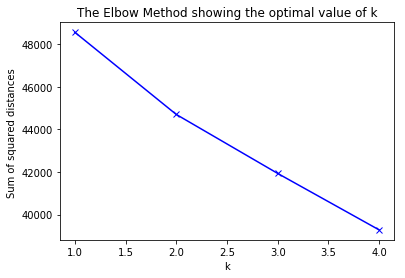

The minimum sum of sqaures of distances is : 39284.7447022  for k 4


In [53]:
### PCA on scaled data using 12 components
pca=PCA(n_components=12,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_12=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 12 components")
print("Kmeans on sclaed data with PCA using 12 components:")
model=get_kmeans(X_pca_scaled_12)

### PCA on scaled data using 13 components

The explained variance for pca applied on scaled data is 0.915033450989 using 13 components
Kmeans on sclaed data with PCA using 13 components:


Cluster_Labels,0
infected#,1215.00
uninfected#,2832.00
infected%,30.02
uninfected%,69.98


Sum of square of distances is: 52598.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1
infected#,1212.0,3.00
uninfected#,2828.0,4.00
infected%,30.0,42.86
uninfected%,70.0,57.14


Sum of square of distances is: 49252.2638939

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2
infected#,365.0,0.0,850.00
uninfected#,2169.0,1.0,662.00
infected%,14.4,0.0,56.22
uninfected%,85.6,100.0,43.78


Sum of square of distances is: 45947.8272717

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels,0,1,2,3
infected#,868.00,344.00,0.0,3.00
uninfected#,724.00,2103.00,1.0,4.00
infected%,54.52,14.06,0.0,42.86
uninfected%,45.48,85.94,100.0,57.14


Sum of square of distances is: 42615.7303687

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



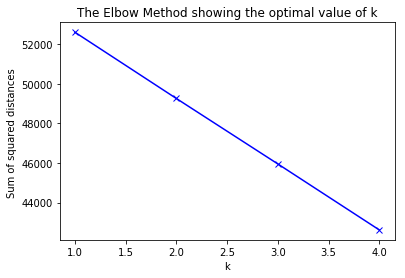

The minimum sum of sqaures of distances is : 42615.7303687  for k 4


In [54]:
### PCA on scaled data using 13 components
pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_scaled_13=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 13 components")
print("Kmeans on sclaed data with PCA using 13 components:")
model=get_kmeans(X_pca_scaled_13)

# We fail to reject the null hypothesis $H_{0}$: unsupervised clustering does not separate infected and uninfected users into distinct clusters, in which 95% of each cluster is composed of one type of user. 

In [8]:
### Original Creator : Darshan Bhansali
### HTML code to hide the input cells 
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle code, click <a href="javascript:code_toggle()">here</a>.''')